### Image Compression using K-Means Algorithm

In [1]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

%matplotlib inline

In [3]:
# reading the image
image = io.imread('wallpaper.jpg')

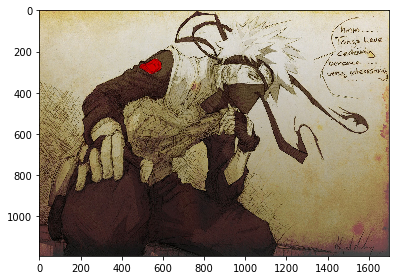

In [4]:
io.imshow(image);

In [5]:
print(image.shape)
# print(image[:5])

(1193, 1700, 3)


In [6]:
# preprocessing
rows, cols = image.shape[0], image.shape[1]
image = image.reshape(rows * cols, 3)

In [7]:
print(image.shape)
print(image[:5])

(2028100, 3)
[[175 113  76]
 [167 109  69]
 [167 114  72]
 [167 120  74]
 [155 113  63]]


In [8]:
# modelling
kMeans = KMeans(n_clusters = 10)
kMeans.fit(image)

KMeans(n_clusters=10)

In [9]:
# centers
centers = np.asarray(kMeans.cluster_centers_, dtype = np.uint8)
centers

array([[ 85,  62,  45],
       [181, 168, 131],
       [162, 146, 100],
       [217, 211, 194],
       [ 32,  21,  18],
       [144, 123,  78],
       [202, 193, 164],
       [117,  91,  63],
       [ 58,  35,  30],
       [179,   3,   3]], dtype=uint8)

In [10]:
# labels 
labels = np.asarray(kMeans.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

(2028100,)
(1193, 1700)


array([[5, 5, 5, ..., 5, 5, 2],
       [6, 6, 6, ..., 7, 7, 7],
       [1, 1, 1, ..., 7, 5, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 7]], dtype=uint8)

In [11]:
# reconstructing
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # assinging every pixel the rgb color of their label's center 
            newImage[i, j, :] = centers[labels[i, j], :]
io.imsave('wallpaper-compressed.jpg', newImage);

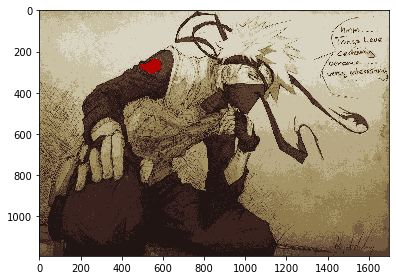

In [12]:
io.imshow(newImage);

Original Image having 595kb is compressed to new image having 343kb